The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="Types_of_concrete_slump.jpg">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px

In [2]:
sns.set_theme(color_codes=True)
sns.set_style('whitegrid')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('slump_test.data')

In [4]:
df.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
df.drop('No',axis = 1, inplace=True)

In [6]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


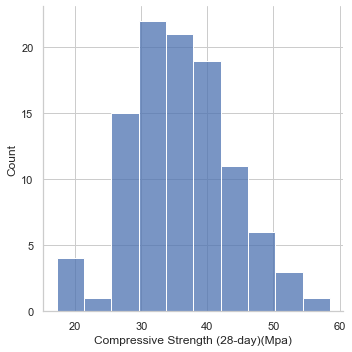

In [7]:
sns.displot(df['Compressive Strength (28-day)(Mpa)'])

In [8]:
df['Compressive Strength (28-day)(Mpa)'].iplot(kind='hist')

In [9]:
df.corr()['Compressive Strength (28-day)(Mpa)'].sort_values()

Slag                                 -0.331588
Water                                -0.254235
SLUMP(cm)                            -0.223358
Coarse Aggr.                         -0.160684
Fine Aggr.                           -0.154484
FLOW(cm)                             -0.124029
SP                                   -0.037871
Fly ash                               0.444393
Cement                                0.445725
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:>

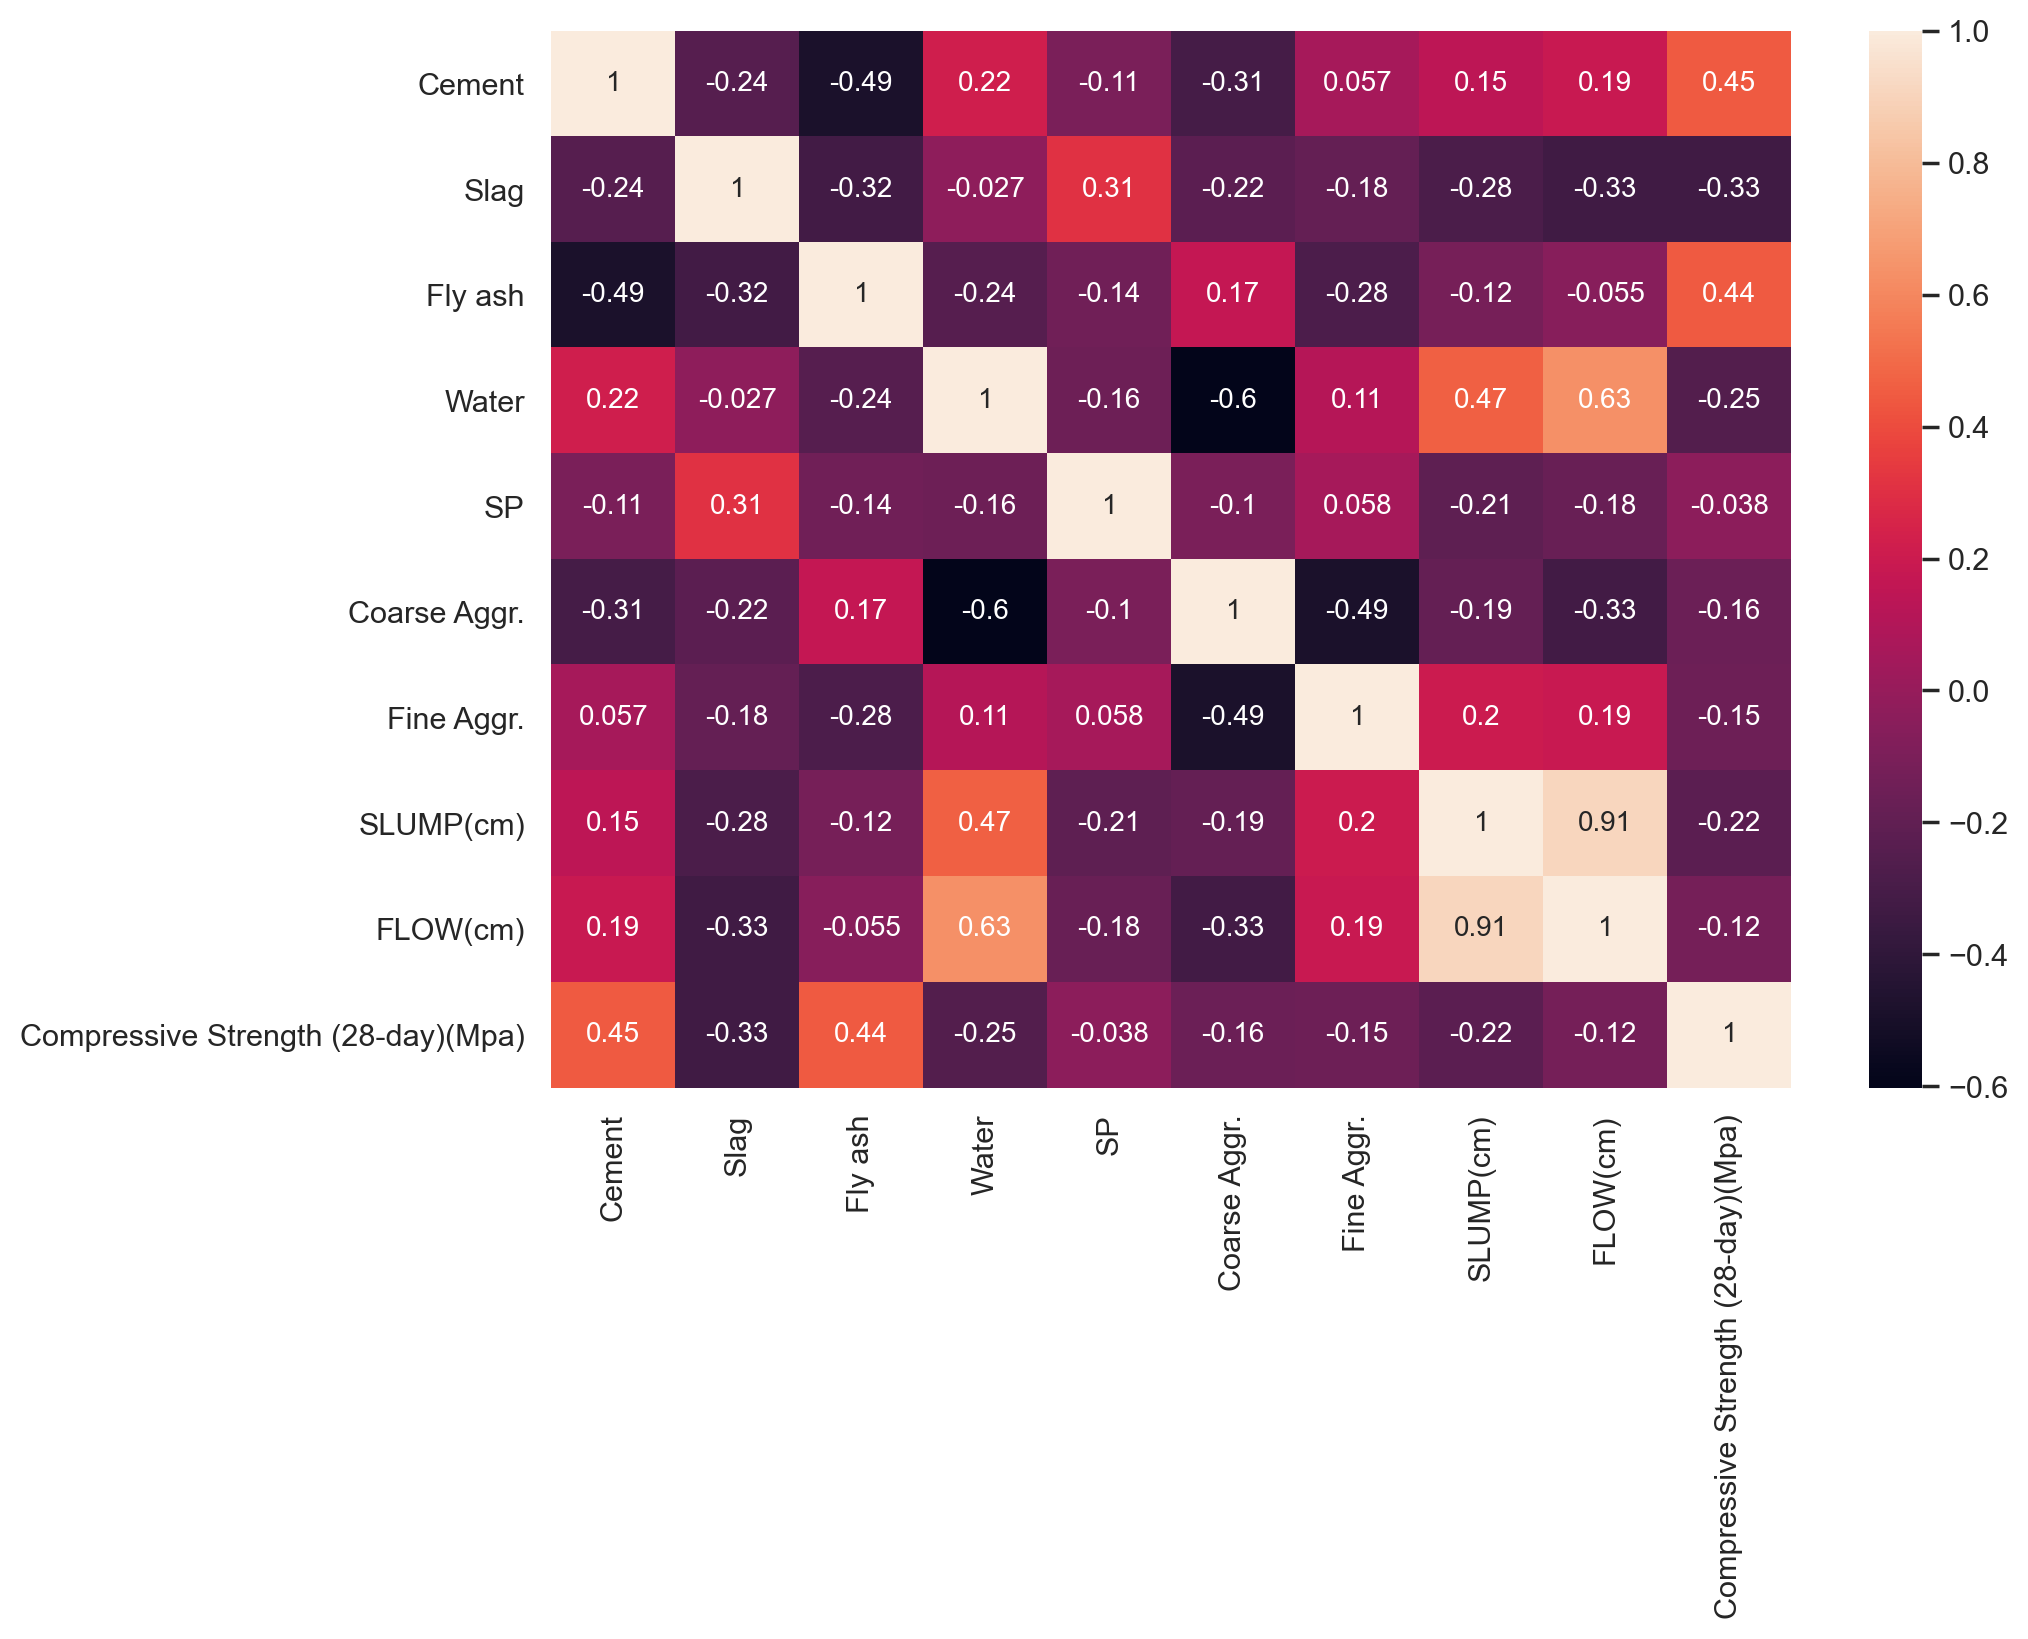

In [10]:
plt.figure(figsize=(10,7), dpi=200)
sns.heatmap(df.corr(),annot=True)

In [11]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [12]:
y = df['Compressive Strength (28-day)(Mpa)']

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
from sklearn.svm import SVR

In [15]:
MODEL = SVR()

In [16]:
scores = cross_val_score(MODEL,X,y,cv=5)
print(scores)
S = np.mean(scores)
abs(S)

[ 0.04356356  0.11605807  0.07881013 -0.02296087 -0.70381899]


0.09766961981642101

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from sklearn.svm import LinearSVR

In [24]:
MODEL.fit(scaled_X_train,y_train)

SVR()

In [25]:
base_preds = MODEL.predict(X_test)

In [26]:
base_preds

array([33.54538508, 36.88488329, 35.31862535, 34.4982983 , 38.78862684,
       37.28692733, 34.70488018, 37.45383093, 38.5643203 , 40.60987705,
       36.12704821, 33.47125341, 33.80688776, 35.57395401, 39.06389895,
       39.20405978, 38.73343751, 36.38267762, 32.54415537, 34.41850278,
       37.08595015, 35.95245982, 35.172924  , 32.85268464, 38.10884757,
       36.35378576, 34.496466  , 33.01047764, 36.06717968, 35.99982788,
       34.58986779])

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mean_absolute_error(y_test,base_preds)

5.236902091259178

In [29]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'C':[0.001,0.05,0.1,0.5,1],'kernel':['linear','rbf','poly'],
             'gamma':['scale','auto'], 'degree':[2,3,4], 'epsilon':[0,0.05,0.1,1,2,2.5]}

In [32]:
svr = SVR()

In [33]:
grid = GridSearchCV(svr,param_grid)

In [34]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.05, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.05, 0.1, 1, 2, 2.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [35]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [36]:
grid_preds = grid.predict(X_test)

In [37]:
mean_absolute_error(y_test,grid_preds)

2.5126440265913006

In [38]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.178085192812248